### Problem Statement:

##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

#### Key attributes of the database

The database includes the following indicators:

country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

country_long` (text): longer form of the country designation

name` (text): name or title of the power plant, generally in Romanized form

gppd_idnr` (text): 10 or 12 character identifier for the power plant

capacity_mw` (number): electrical generating capacity in megawatts

latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

primary_fuel` (text): energy source used in primary electricity generation or export

other_fuel1` (text): energy source used in electricity generation or export

other_fuel2` (text): energy source used in electricity generation or export

other_fuel3` (text): energy source used in electricity generation or export

commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

owner` (text): majority shareholder of the power plant, generally in Romanized form

source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
url` (text): web document corresponding to the `source` field

geolocation_source` (text): attribution for geolocation information

wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

year_of_capacity_data` (number): year the capacity information was reported

generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

generation_data_source` (text): attribution for the reported generation information

estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

### Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

### Prediction :   Make two prediction  1) Fuel Type   2) capacity_mw 

In [125]:
### import Necessary labries

#importing the necessary libraries for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

#importing numpy and panda
import numpy as np
import pandas as pd

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from statsmodels.formula.api import ols

#librariers to build models and checking accuracy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#library to split data
from sklearn.model_selection import train_test_split

#library for EDA
from scipy.stats import zscore

#Library for saving data
import pickle

#library for GridSearchCV 
from sklearn.model_selection import GridSearchCV

#library for error detection in regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error

#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import warnings
warnings.filterwarnings('ignore')

In [71]:
data = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

The database has 25 columns

In the dataset  categorical and numerical both are present

In [73]:
data.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
count,908,908,908,908,908.000000,862.000000,862.000000,908,199,1,...,889,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,450,0.0
unique,1,1,908,908,NaN,NaN,NaN,8,3,1,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,E.G. CANAL,IND0000262,NaN,NaN,NaN,Coal,Oil,Oil,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,908,908,1,1,NaN,NaN,NaN,259,196,1,...,766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN
mean,NaN,NaN,NaN,NaN,321.046378,21.196189,77.447848,NaN,NaN,NaN,...,NaN,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
std,NaN,NaN,NaN,NaN,580.221767,6.248627,4.907260,NaN,NaN,NaN,...,NaN,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,...,NaN,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.837500,16.771575,74.258975,NaN,NaN,NaN,...,NaN,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN,NaN
50%,NaN,NaN,NaN,NaN,60.000000,21.778300,76.719250,NaN,NaN,NaN,...,NaN,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN,NaN
75%,NaN,NaN,NaN,NaN,388.125000,25.516375,79.441475,NaN,NaN,NaN,...,NaN,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN,NaN


Number of rows/data present is 908

Large number of null values present

Only one unique value present in country,country_long,other_fuel2,generation_data_source, so will drop the columns

In [74]:
data = data.drop(columns=["country","country_long","other_fuel2","generation_data_source","other_fuel1"])

#### Finding numerical and categorical data

In [75]:
# finding numerical data
data.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'other_fuel3',
       'commissioning_year', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017',
       'estimated_generation_gwh'],
      dtype='object')

In [76]:
# finding categorical data
data.select_dtypes(exclude=["number"]).columns

Index(['name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url',
       'geolocation_source'],
      dtype='object')

In [77]:
cat = data[{'name','gppd_idnr','primary_fuel','owner','source','url','geolocation_source'}]
cat

,gppd_idnr,primary_fuel,geolocation_source,name,url,owner,source
0,WRI1020239,Solar,National Renewable Energy Laboratory,ACME Solar Tower,http://www.nrel.gov/csp/solarpaces/project_det...,Solar Paces,National Renewable Energy Laboratory
1,WRI1019881,Coal,WRI,ADITYA CEMENT WORKS,http://www.ultratechcement.com/,Ultratech Cement ltd,Ultratech Cement ltd
2,WRI1026669,Wind,WRI,AES Saurashtra Windfarms,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,AES,CDM
3,IND0000001,Gas,WRI,AGARTALA GT,http://www.cea.nic.in/,NaN,Central Electricity Authority
4,IND0000002,Coal,WRI,AKALTARA TPP,http://www.cea.nic.in/,NaN,Central Electricity Authority
...,...,...,...,...,...,...,...
903,IND0000513,Coal,WRI,YERMARUS TPP,http://www.cea.nic.in/,NaN,Central Electricity Authority
904,WRI1026222,Solar,Industry About,Yelesandra Solar Power Plant,http://karnatakapower.com,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited
905,WRI1026776,Wind,WRI,Yelisirur wind power project,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,NaN,CDM
906,WRI1019901,Coal,WRI,ZAWAR MINES,http://www.hzlindia.com/,Hindustan Zinc ltd,Hindustan Zinc ltd


#### EDA

In [78]:
# checking null values
data.isnull().sum()

name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
estimated_generation_gwh    908
dtype: int64

There are many missing value in dataset

In [79]:
#calculating percentage of null values
def missing_values(data, percentage):

    columns = data.columns
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_data[missing_value_data.percent_missing>percentage].column_name)
    data = data.drop(missing_drop, axis=1)
    return missing_value_data

In [80]:
missing_values(data,80)

,column_name,percent_missing
name,name,0.000000
gppd_idnr,gppd_idnr,0.000000
capacity_mw,capacity_mw,0.000000
latitude,latitude,5.066079
longitude,longitude,5.066079
primary_fuel,primary_fuel,0.000000
other_fuel3,other_fuel3,100.000000
commissioning_year,commissioning_year,41.850220
owner,owner,62.334802
source,source,0.000000


#### Removing columns which have above 70% null values

In [81]:
data = data .drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.70)], axis=1)

#### removing duplicate values

In [82]:
data.drop_duplicates(inplace=True)

#### Mean of columns which have numerical data and have null values

Numerical columns are capacity_mw', 'latitude', 'longitude', 'other_fuel3', , 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'estimated_generation_gwh'

In it null values are there in latitude,longitude,generation_gwh_2013, generation_gwh_2014, generation_gwh_2015,generation_gwh_2016, generation_gwh_2017

dealing with these null values by replacing it with mean

In [83]:
data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)
data["generation_gwh_2013"].fillna(data["generation_gwh_2013"].mean(),inplace=True)
data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].mean(),inplace=True)
data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].mean(),inplace=True)
data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].mean(),inplace=True)
data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].mean(),inplace=True)

#### Mode of columns with categorical datas

In [84]:
#data["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["owner"].fillna(data["owner"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)
data["year_of_capacity_data"].fillna(data["year_of_capacity_data"].mode()[0],inplace=True)

In [85]:
#Checking null values
data.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
generation_gwh_2013      0
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
dtype: int64

In [ ]:
Now There is no any missing value in my dataset

#### Analysing data

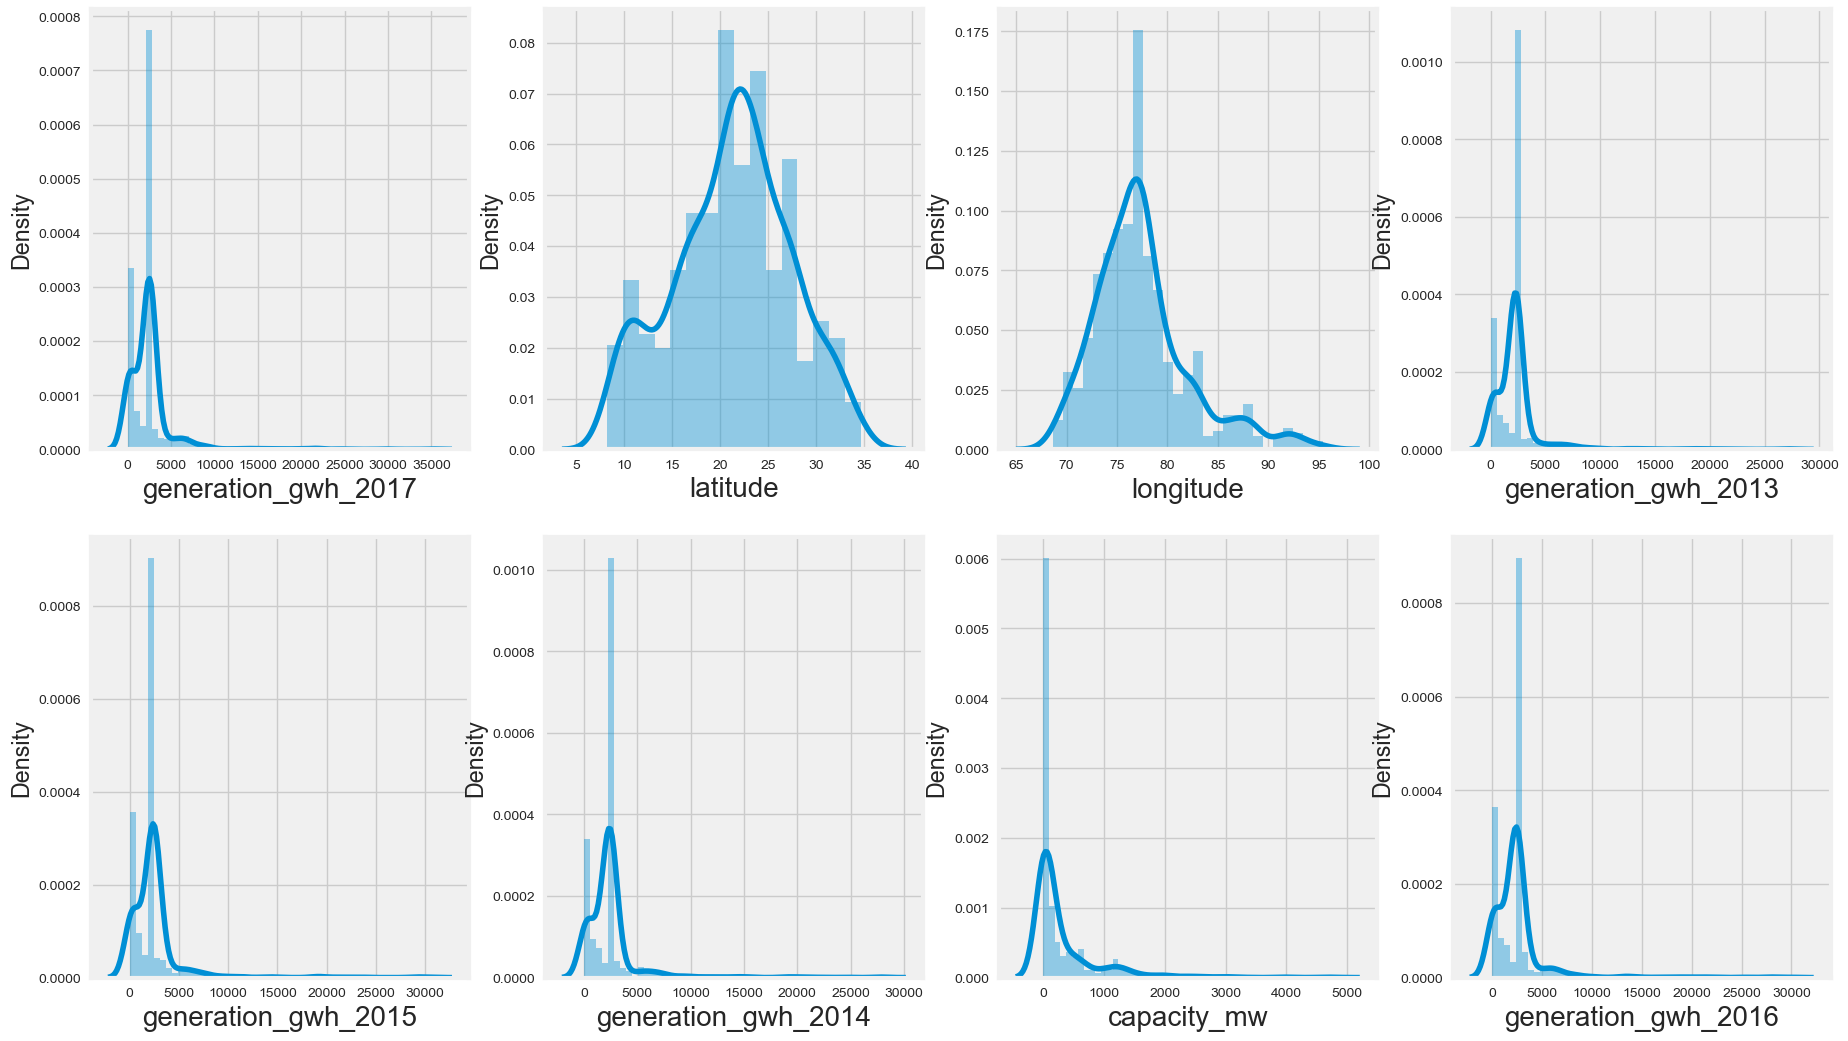

In [87]:
# Numerical data
num = data[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in num:
    if plotnumber<16:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(num[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
    
plt.show()

Highest value:

1.longitude is 78 and latitude is 22

2.generation_gwh_2017 is 3000,generation_gwh_2014 is 2200,generation_gwh_2013 is 2200,generation_gwh_2015 is 2200, generation_gwh_2016 is 2200

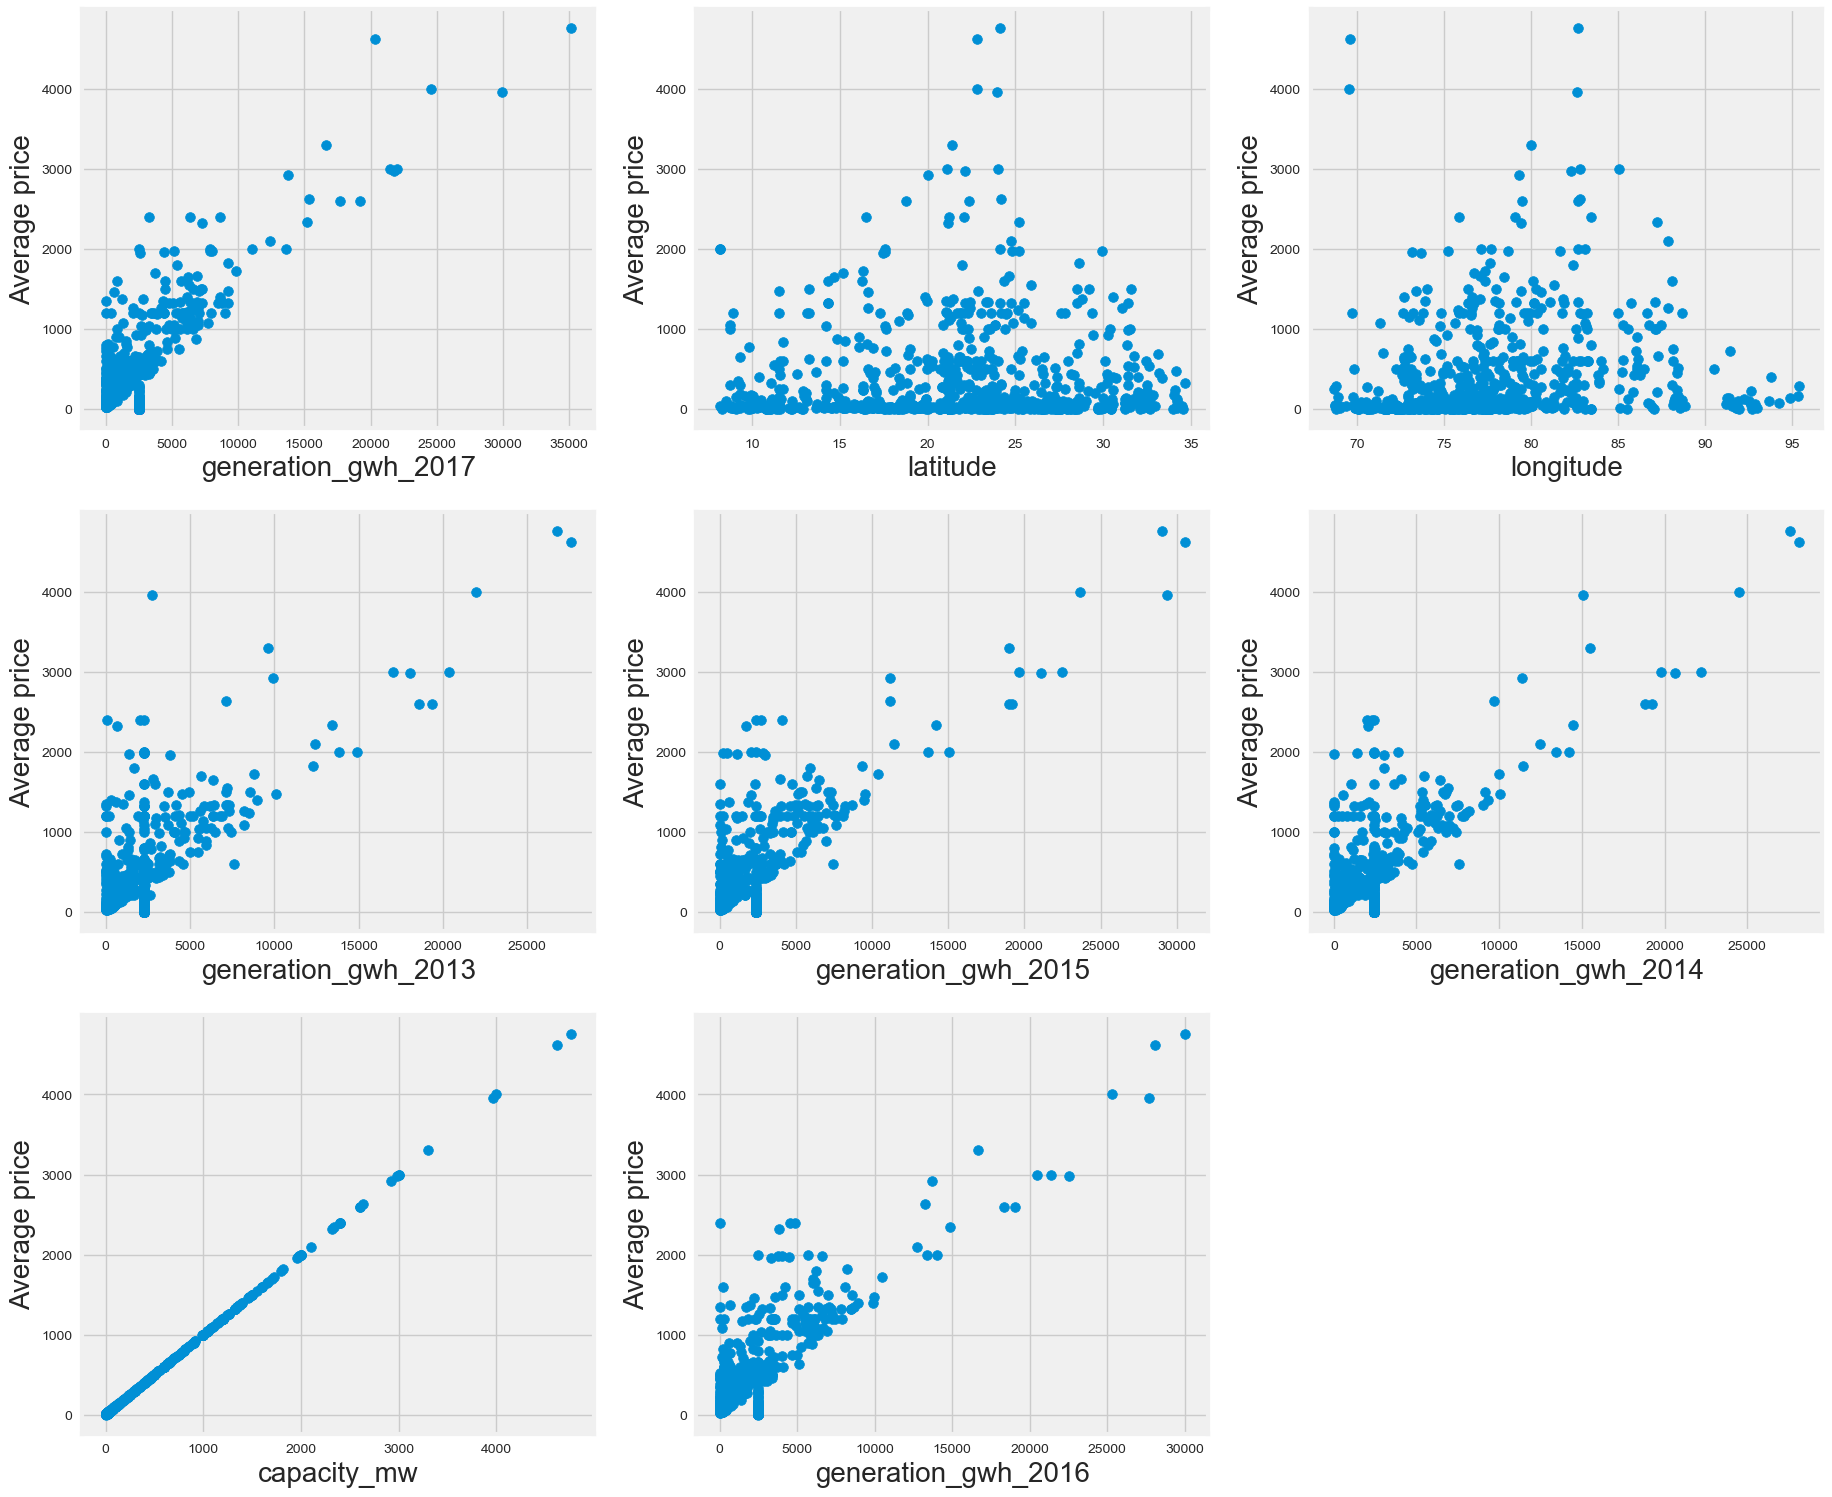

In [88]:
#Analysing the relationship between numerical features and capacity_mw

y_table=data['capacity_mw']

#visualising the relationship- scatter plot 
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in num:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(num[column],y_table)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Average price',fontsize=20)
    plotnumber+=1
plt.show()

Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

Most of the latitude between 70 and 87 degree are having capacity between 0 and 1000MW

The capacity increases as generation_gwh_2017 increases. The 2013,2014,2015 and 2016 is similar to this

#### dealing outliers on numerical data

In [89]:
#finding numerical datas
data.select_dtypes(include=["number"]).columns

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'],
      dtype='object')

In [90]:
num=data[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]
num

,generation_gwh_2017,latitude,longitude,generation_gwh_2013,generation_gwh_2015,generation_gwh_2014,capacity_mw,generation_gwh_2016
0,2531.754458,28.1839,73.2407,2304.059202,2414.072373,2420.393316,2.5,2453.936292
1,2531.754458,24.7663,74.6090,2304.059202,2414.072373,2420.393316,98.0,2453.936292
2,2531.754458,21.9038,69.3732,2304.059202,2414.072373,2420.393316,39.2,2453.936292
3,663.774500,23.8712,91.3602,631.777928,843.747000,617.789264,135.0,886.004428
4,5385.579736,21.9603,82.4091,1668.290000,5916.370000,3035.550000,1800.0,6243.000000
...,...,...,...,...,...,...,...,...
903,865.400000,16.2949,77.3568,2304.059202,0.994875,2420.393316,1600.0,233.596650
904,2531.754458,12.8932,78.1654,2304.059202,2414.072373,2420.393316,3.0,2453.936292
905,2531.754458,15.2758,75.5811,2304.059202,2414.072373,2420.393316,25.5,2453.936292
906,2531.754458,24.3500,73.7477,2304.059202,2414.072373,2420.393316,80.0,2453.936292


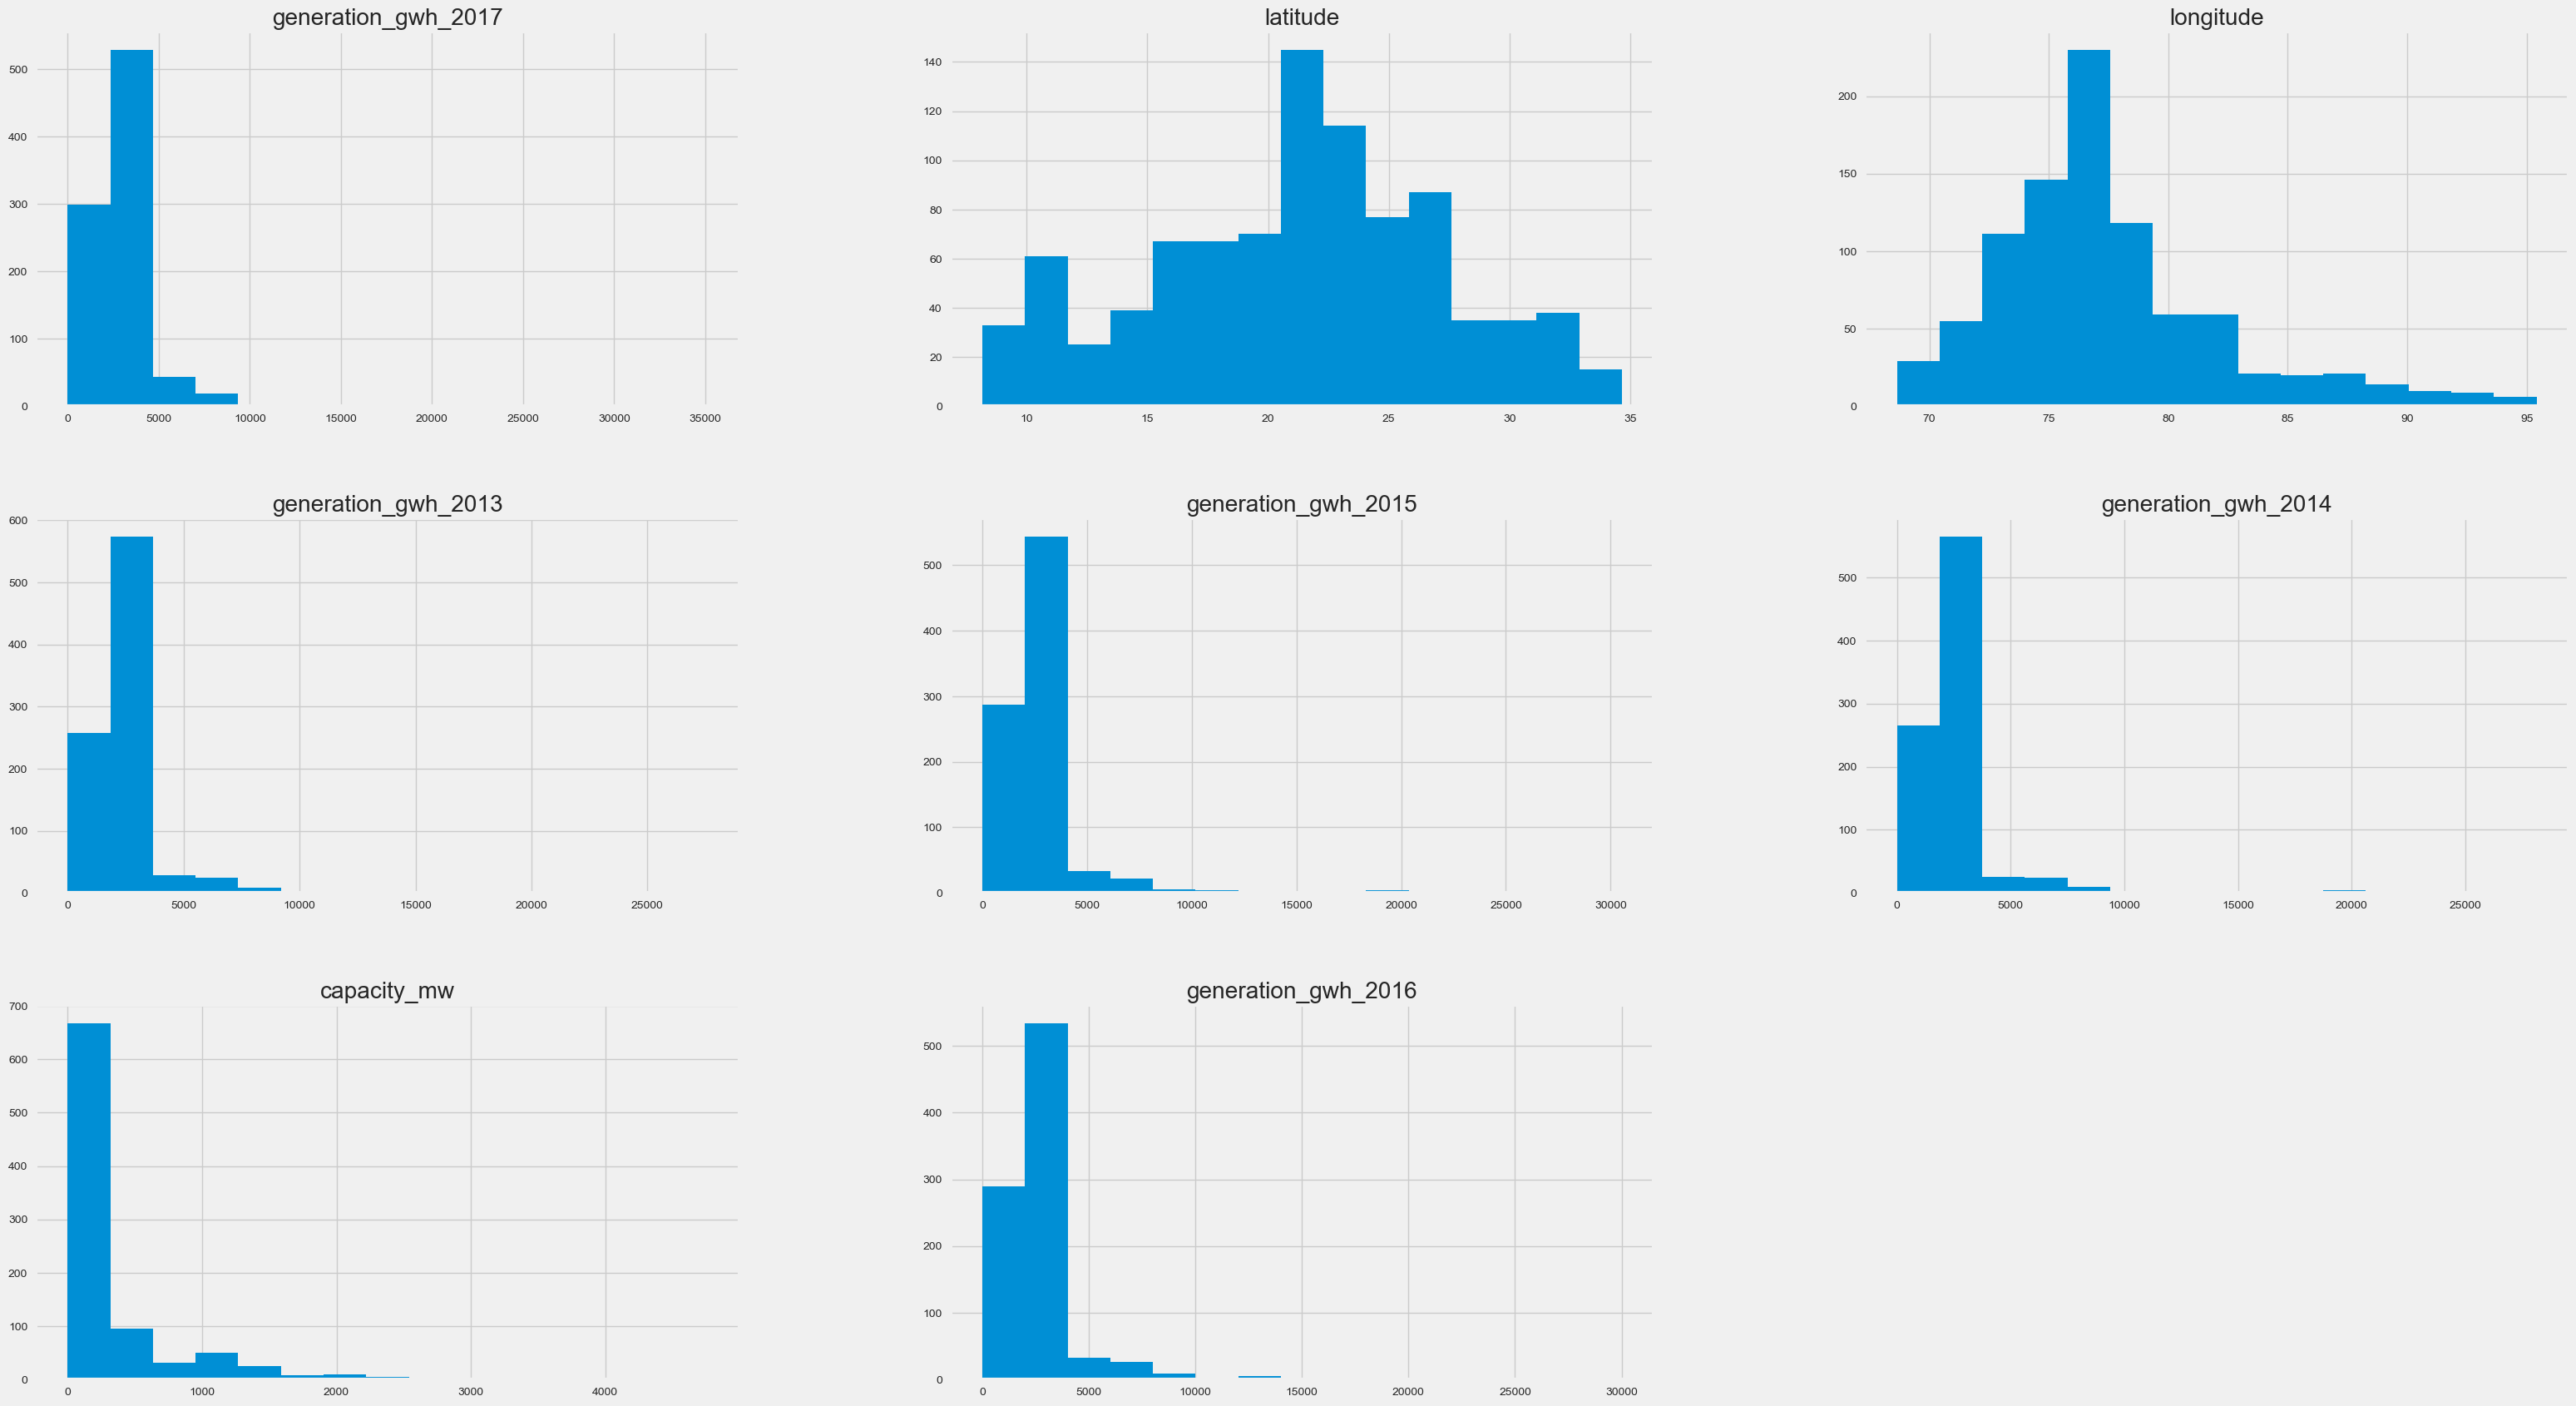

In [91]:
num.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

There is outliers present in as well as skewness in generation_gwh2017,2016,2014,2013 and 2015 which needs to be removed

In [92]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
data_new=data[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(data))
print("columns after applying zscore: ",len(data_new))

columns before applying zscore:  908
columns after applying zscore:  867


In [94]:
data_new

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


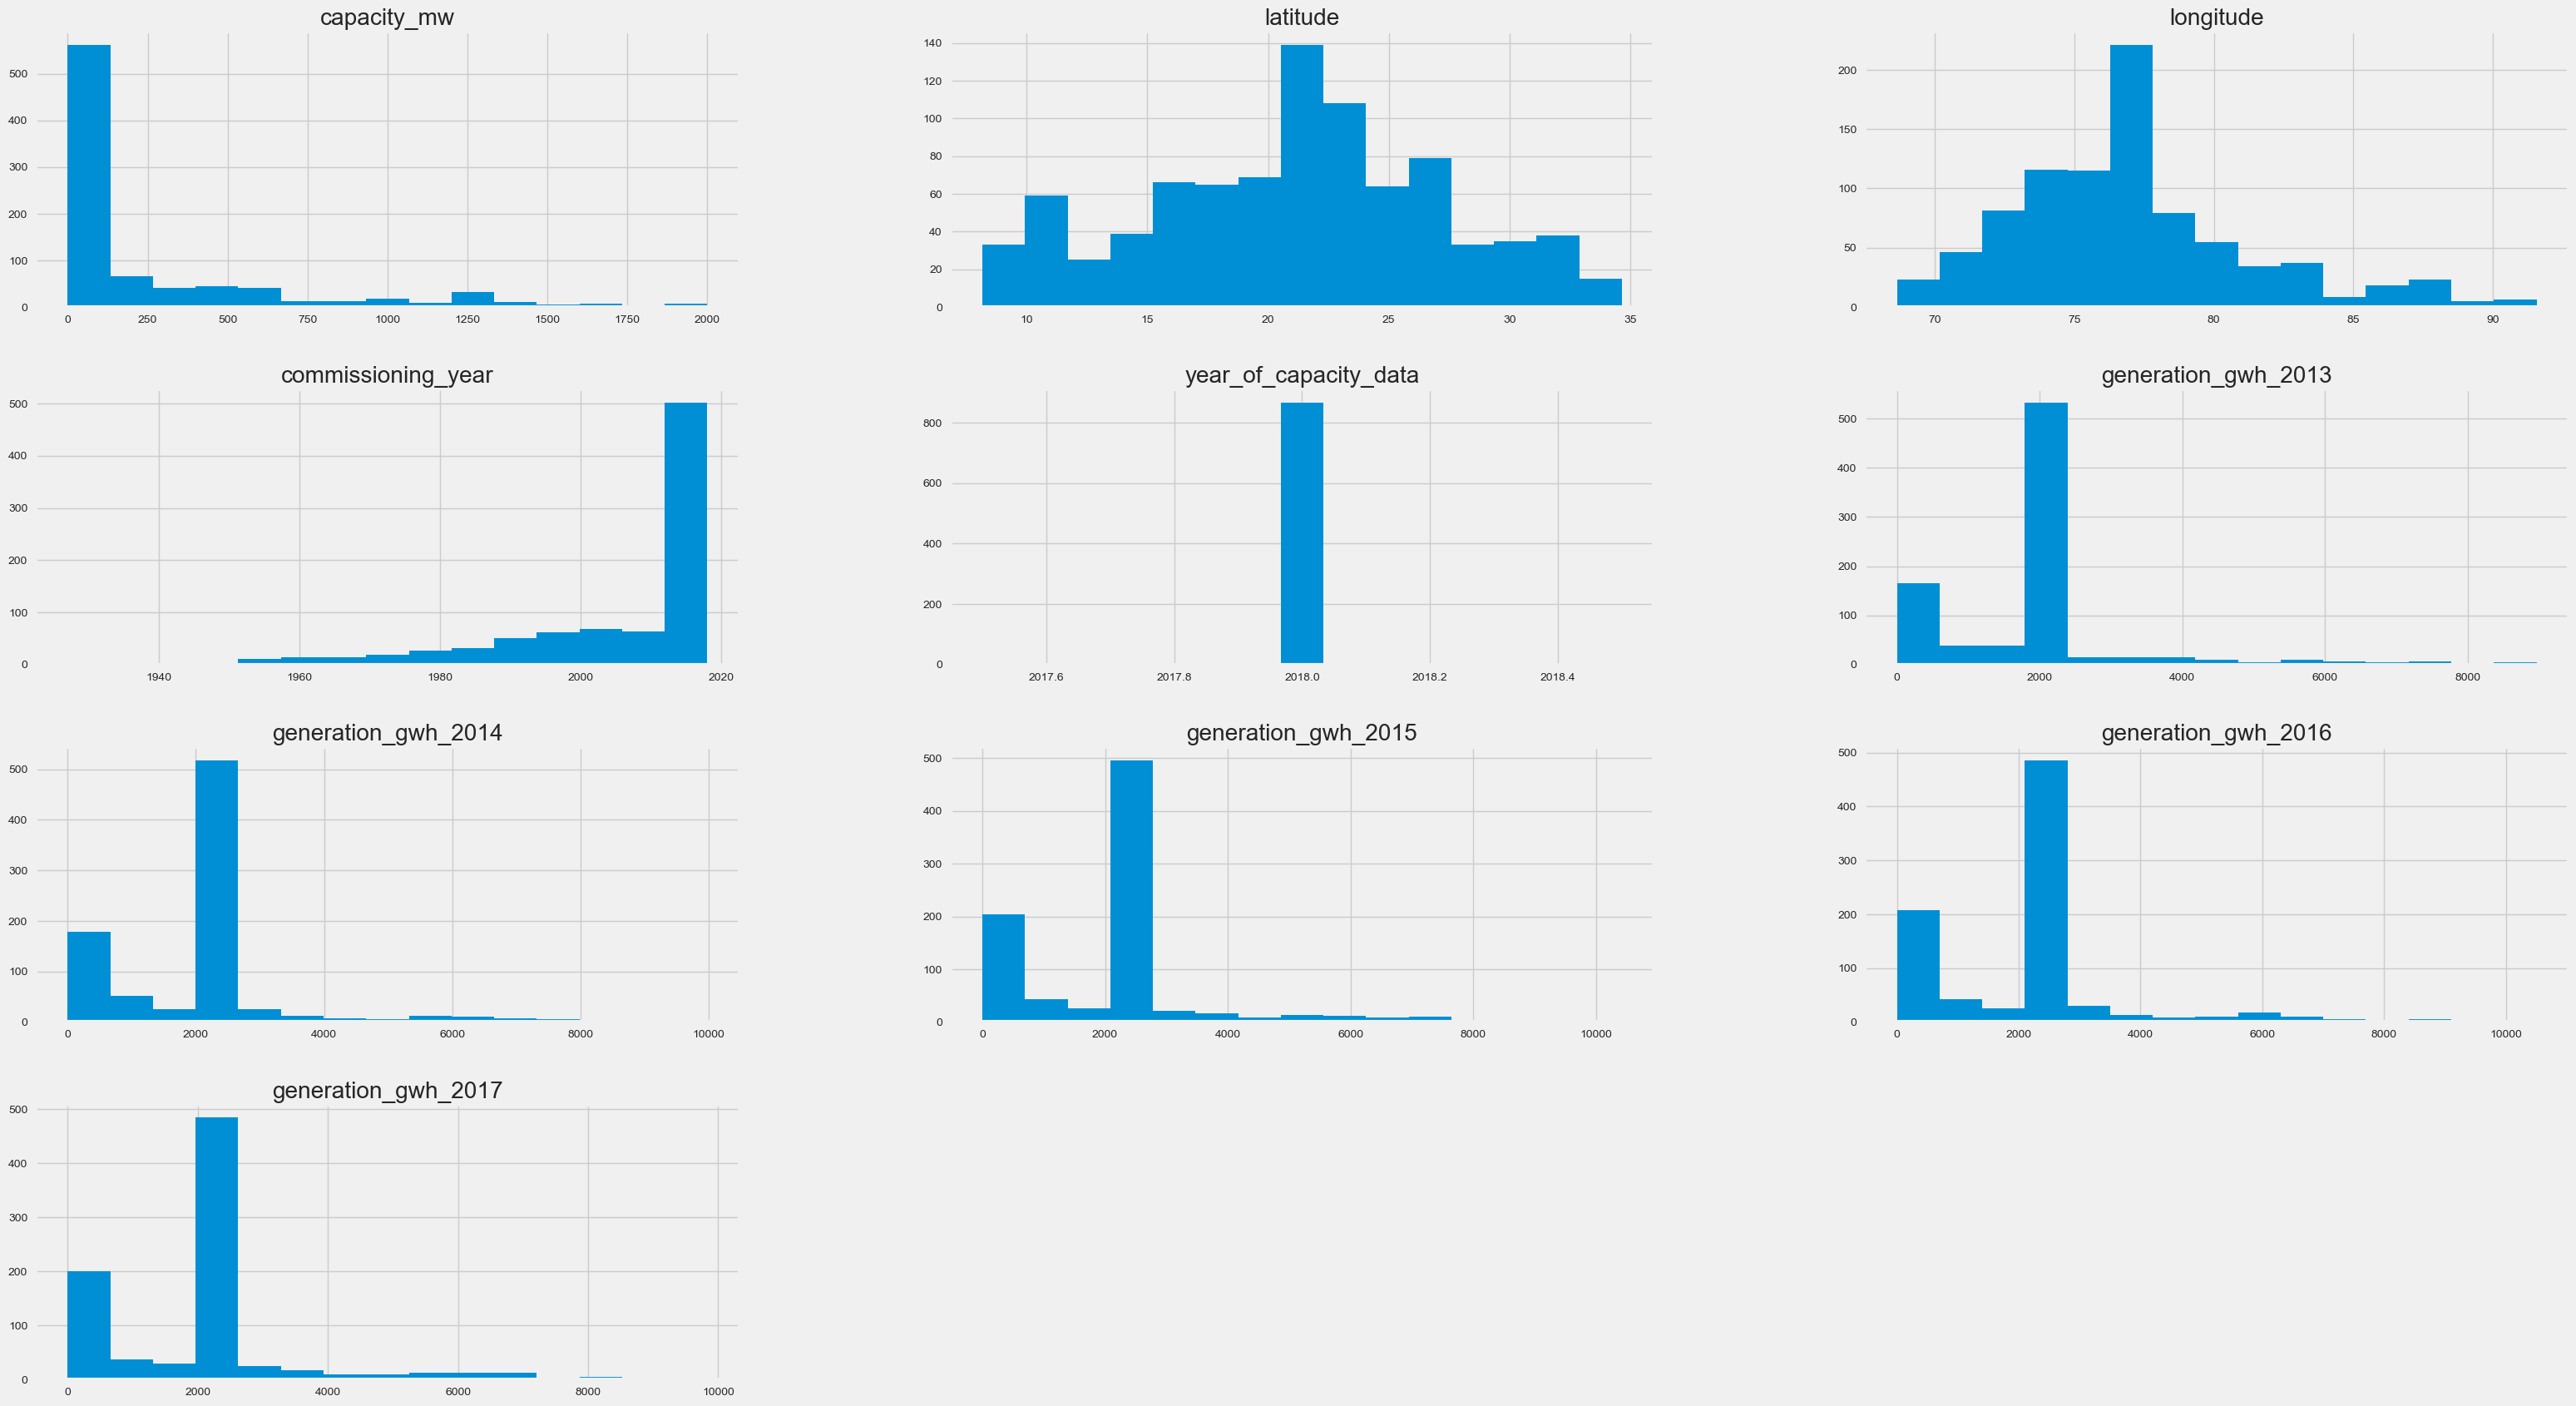

In [95]:
data_new.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()

skewness is still present hence will remove it

In [97]:
data_new.skew()

capacity_mw              2.017835
latitude                -0.103418
longitude                0.864288
commissioning_year      -1.823597
year_of_capacity_data    0.000000
generation_gwh_2013      1.529639
generation_gwh_2014      1.441757
generation_gwh_2015      1.328513
generation_gwh_2016      1.354065
generation_gwh_2017      1.250408
dtype: float64

In [98]:
#removing skewness using log1p
num=data_new[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

for col in num:
    if num.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [99]:
data

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,ACME Solar Tower,WRI1020239,1.252763,28.1839,4.307313,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
1,ADITYA CEMENT WORKS,WRI1019881,4.595120,24.7663,4.325575,Coal,2013.0,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
2,AES Saurashtra Windfarms,WRI1026669,3.693867,21.9038,4.253813,Wind,2013.0,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
3,AGARTALA GT,IND0000001,4.912655,23.8712,4.525696,Gas,2004.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,6.450120,6.427765,6.739037,6.787850,6.499448
4,AKALTARA TPP,IND0000002,7.496097,21.9603,4.423757,Coal,2015.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7.420154,8.018477,8.685647,8.739376,8.591666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,YERMARUS TPP,IND0000513,7.378384,16.2949,4.361273,Coal,2016.0,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2018.0,7.742862,7.792098,0.690581,5.457868,6.764347
904,Yelesandra Solar Power Plant,WRI1026222,1.386294,12.8932,4.371539,Solar,2013.0,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
905,Yelisirur wind power project,WRI1026776,3.277145,15.2758,4.338350,Wind,2013.0,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063
906,ZAWAR MINES,WRI1019901,4.394449,24.3500,4.314118,Coal,2013.0,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063


#### Regression for predicting capacity_mw

In [100]:
#understanding the relationship between independent variable with label
data_corr=data.corr()
data_corr["capacity_mw"].sort_values(ascending=False)

capacity_mw              1.000000
longitude                0.311277
latitude                 0.063157
generation_gwh_2016     -0.038057
generation_gwh_2013     -0.048017
generation_gwh_2017     -0.051759
generation_gwh_2014     -0.054577
generation_gwh_2015     -0.055518
commissioning_year      -0.108333
year_of_capacity_data         NaN
Name: capacity_mw, dtype: float64

gppd_idnr,generation_gwh_2014,generation_gwh_2013,generation_gwh_2015 and generation_gwh_2016 has high multicollinearity

df.drop(columns=["generation_gwh_2016","generation_gwh_2014"],inplace=True)

In [103]:
#one hot encoding on data
data=pd.get_dummies(data)
data

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,...,url_https://www.iaea.org/PRIS/CountryStatistics/ReactorDetails.aspx?current=853,url_https://www.iocl.com,url_https://www.jaibalajigroup.com/power.html,url_https://www.kesocorp.com/,url_https://www.solairedirect.com,url_https://www.vardhman.com/,url_https://www.zaubacorp.com/company/MAHATMA-SUGAR-POWER-LIMITED/U15421MH1997PLC111855,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,1.252763,28.1839,4.307313,2011.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,1,0
1,4.595120,24.7663,4.325575,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
2,3.693867,21.9038,4.253813,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
3,4.912655,23.8712,4.525696,2004.0,2018.0,6.450120,6.427765,6.739037,6.787850,6.499448,...,0,0,0,0,0,0,0,0,0,1
4,7.496097,21.9603,4.423757,2015.0,2018.0,7.420154,8.018477,8.685647,8.739376,8.591666,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,7.378384,16.2949,4.361273,2016.0,2018.0,7.742862,7.792098,0.690581,5.457868,6.764347,...,0,0,0,0,0,0,0,0,0,1
904,1.386294,12.8932,4.371539,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,1,0,0
905,3.277145,15.2758,4.338350,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1
906,4.394449,24.3500,4.314118,2013.0,2018.0,7.742862,7.792098,7.789485,7.805856,7.837063,...,0,0,0,0,0,0,0,0,0,1


In [104]:
x=data.drop(columns=["capacity_mw"])
y=data['capacity_mw']

In [105]:
#standardising the data for PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(data)

scaledX

array([[-1.6340626 ,  1.1483961 , -0.9010043 , ..., -0.38836044,
        15.03329638, -2.52628459],
       [ 0.16015781,  0.58673028, -0.59249618, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [-0.32364638,  0.11629242, -1.8047639 , ..., -0.38836044,
        -0.06651901,  0.39583822],
       ...,
       [-0.54734828, -0.97298691, -0.37669217, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [ 0.05243519,  0.51831341, -0.78603384, ..., -0.38836044,
        -0.06651901,  0.39583822],
       [-0.77009551, -1.85081984,  0.03638046, ..., -0.38836044,
        -0.06651901,  0.39583822]])

In [106]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  0.39379694,   0.67367717,   0.90628495,   1.13328185,
         1.35316668,   1.5640445 ,   1.76414639,   1.96209581,
         2.15738895,   2.35235866,   2.54456885,   2.73665691,
         2.92861986,   3.12057712,   3.31253357,   3.5044868 ,
         3.69642955,   3.88836648,   4.08029424,   4.27219889,
         4.46410184,   4.65599373,   4.84787592,   5.03975329,
         5.23162985,   5.42348853,   5.61534107,   5.80717668,
         5.99901228,   6.19084788,   6.38268349,   6.57451909,
         6.76635388,   6.95818729,   7.15001669,   7.34184285,
         7.53366833,   7.72548573,   7.91729887,   8.10909914,
         8.30089205,   8.49267926,   8.68446053,   8.87621466,
         9.06796562,   9.25971592,   9.45146595,   9.64321298,
         9.83495863,  10.02669674,  10.21840538,  10.41011403,
        10.60182267,  10.79353131,  10.98523996,  11.1769486 ,
        11.36865724,  11.56036589,  11.75207453,  11.94378317,
        12.13549182,  12.32720046,  12.5189091 ,  12.71

In [107]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  841


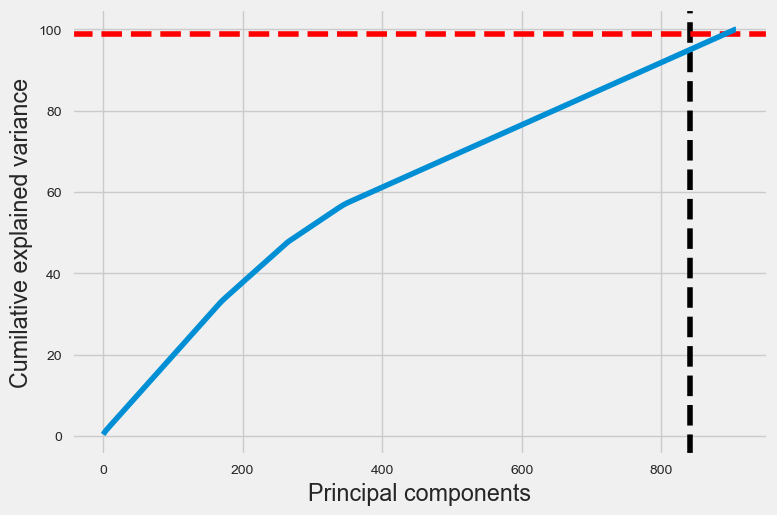

In [109]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [110]:
# Creating final dataset with 800 columns

FinalPCA=PCA(n_components=802)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,792,793,794,795,796,797,798,799,800,801
0,5.881797,3.215648,-0.307750,5.659988,32.093315,-1.258731,-0.646261,1.130102,-0.792688,-1.479646,...,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00
1,1.369554,-2.514439,-0.197532,5.894985,-1.310413,1.926481,0.206614,-0.642820,-1.336944,-0.466446,...,-1.512421e+00,-8.470705e-01,-5.267384e-01,-8.366851e-01,-2.671514e-02,-8.013449e-01,-2.432732e-01,3.544094e-01,-1.107472e+00,1.319456e+00
2,2.531264,-4.360166,-4.168397,-3.030491,0.508155,-0.876724,-0.150693,-1.252920,0.029304,0.212350,...,-3.619094e-15,-9.033578e-15,3.576622e-15,-5.048992e-15,-1.855839e-15,2.239470e-15,1.860687e-15,1.775020e-15,-5.126135e-15,-3.278161e-15
3,-2.652811,0.916086,0.142703,0.088031,-0.057217,-0.227725,0.916583,0.560425,0.718668,-0.108173,...,7.623100e-01,2.290648e+00,-1.240590e+00,3.764766e-01,-1.426512e+00,-2.970096e-01,9.434271e-01,1.012828e+00,5.263746e-01,1.070307e+00
4,-1.524219,-0.460806,-0.186335,2.561195,-0.489501,-0.416871,-0.451333,-0.023129,0.650960,0.867424,...,-6.330950e-01,-2.942921e+00,-2.871909e-01,9.479712e-01,7.246404e-01,-1.088047e+00,5.657750e-02,7.606662e-01,1.455552e-01,8.644251e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-2.702125,0.580182,0.040253,0.490421,-0.105244,0.069757,-0.087528,0.144367,-0.404489,0.165543,...,-3.370870e-01,-4.222923e-01,8.556035e-01,1.522985e+00,-1.891001e+00,2.830108e+00,5.954654e-01,-2.286589e+00,-1.055186e+00,-1.349127e+00
904,6.125840,3.814593,0.331643,-1.564547,-1.337001,-0.217725,-0.795502,11.024501,-6.646023,0.688894,...,-2.024084e+00,1.251728e+00,-4.520403e-01,1.466866e+00,-7.307205e-01,4.357432e-02,6.934569e-01,-8.296093e-01,-2.044222e+00,-1.298005e-01
905,1.165034,-3.213803,-2.885018,-1.974073,0.165245,-0.931805,-0.461880,0.057084,0.226898,0.254327,...,-4.586998e-15,3.772225e-15,1.738182e-15,3.698260e-16,1.213029e-14,8.801859e-15,-2.015552e-15,6.471955e-16,-4.437912e-16,-1.645726e-15
906,1.434634,-2.487952,-0.310273,6.110067,-1.162307,2.120305,1.043883,-5.203905,-1.473423,3.156885,...,2.439639e-02,6.710048e-01,-1.564790e+00,3.214195e-01,-5.856697e-01,2.860978e+00,1.790791e+00,-2.150558e-01,3.828301e-01,3.302279e-02


In [111]:
df_new=FinalData2

#### Train test split

In [114]:
#splitting the data into train and test
x=df_new
y=data['capacity_mw']

x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [115]:
y_train.head()

349    4.795791
866    4.110874
586    5.398163
329    3.128513
663    2.397895
Name: capacity_mw, dtype: float64

#### Finding best random state

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxr2=r2
        maxRS=i

print("Best r2 score is", maxr2,"on Random State",maxRS)

Best r2 score is 0.7916725163328708 on Random State 199


In [118]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=199)

In [119]:
#Linear Regression
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("r2 score of LinearRegression model is",r2_score(y_test,predlr))

r2 score of LinearRegression model is 0.7916725163328708


In [121]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
predlr=dt.predict(x_test)
print("r2 score of DecisionTreeRegressor model is",r2_score(y_test,predlr))

r2 score of DecisionTreeRegressor model is 0.8721634222010258


In [122]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predlr=rf.predict(x_test)
print("r2 score of RandomForestRegressor model is",r2_score(y_test,predlr))

r2 score of RandomForestRegressor model is 0.9448968458153973


In [123]:
#cross validation
#Finding overfitting
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
import statsmodels.api

scr1=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Linear Regression model :", scr1.mean())

scr2=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr2.mean())

scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr3.mean())

Cross validation score of Linear Regression model : 0.8395242158868431
Cross validation score of Decision Tree model : 0.8472066404274827
Cross validation score of Random Forest model : 0.9388666668169039


The best model is Random Forest model 

#### Regularisation

In [126]:
lasscv=LassoCV(alphas=None, max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

#best alpha parameter
alpha=lasscv.alpha_

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

lasso_reg.score(x_test,y_test)

0.9974535045191963

In [127]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.8018763237297635

#### hyperparameter tuning

In [128]:
#RandomForestRegressor
paramters={'n_estimators':[2,4,5,6,8],
           'min_samples_split':[2,3,4],
           'min_samples_leaf':[2,3,4],
           'max_leaf_nodes':[2,3,4],
           'max_features':['auto','sqrt','log2'],   
}

In [129]:
GCV=GridSearchCV(RandomForestRegressor(),paramters,cv=6)

In [130]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [2, 4, 5, 6, 8]})

In [131]:
GCV.best_params_

{'max_features': 'auto',
 'max_leaf_nodes': 4,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 8}

In [132]:
mod=RandomForestRegressor(n_estimators=8,max_leaf_nodes=4,min_samples_leaf=4,min_samples_split=2,max_features='auto')

In [133]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(r2_score(y_test,pred)*100)

76.64261905706692


In [134]:
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

RandomForestRegressor()

#### saving the model

In [135]:
import joblib
joblib.dump(mod,'Global power plant.pk1')

['Global power plant.pk1']

## Building classification model for fuel type

In [145]:
data = pd.read_csv(r"C:\Users\admin\Desktop\Python basis\Eve\database_IND.csv")
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [146]:
#EDA

data=data.drop(columns=['country','country_long','other_fuel2','generation_data_source','other_fuel1','url'])

#calculating percentage of null values
def missing_values(data, percentage):

    columns = data.columns
    percent_missing = data.isnull().sum() * 100 / len(data)
    missing_value_data = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

    missing_drop = list(missing_value_df[missing_value_df.percent_missing>percentage].column_name)
    data = data.drop(missing_drop, axis=1)
    return missing_value_data

data = data.drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.70)], axis=1)

data.drop_duplicates(inplace=True)

data["latitude"].fillna(data["latitude"].mean(),inplace=True)
data["longitude"].fillna(data["longitude"].mean(),inplace=True)
data["generation_gwh_2013"].fillna(data["generation_gwh_2013"].mean(),inplace=True)
data["generation_gwh_2014"].fillna(data["generation_gwh_2014"].mean(),inplace=True)
data["generation_gwh_2015"].fillna(data["generation_gwh_2015"].mean(),inplace=True)
data["generation_gwh_2017"].fillna(data["generation_gwh_2017"].mean(),inplace=True)
data["generation_gwh_2016"].fillna(data["generation_gwh_2016"].mean(),inplace=True)

#data["other_fuel1"].fillna(df["other_fuel1"].mode()[0],inplace=True)
data["commissioning_year"].fillna(data["commissioning_year"].mode()[0],inplace=True)
data["owner"].fillna(data["owner"].mode()[0],inplace=True)
data["geolocation_source"].fillna(data["geolocation_source"].mode()[0],inplace=True)
data["year_of_capacity_data"].fillna(data["year_of_capacity_data"].mode()[0],inplace=True)

num=data[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(num))
threshold=3
data_new=data[(z<3).all(axis=1)]

print("columns before applying zscore: ",len(data))
print("columns after applying zscore: ",len(data_new))

#removing skewness using log1p
num=data_new[{'capacity_mw','latitude','longitude','generation_gwh_2013', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'}]

for col in num:
    if num.skew().loc[col]>0.55:
        data_new[col]=np.log1p(data_new[col])
        
data=data_new

columns before applying zscore:  908
columns after applying zscore:  867


In [147]:
data["primary_fuel"].value_counts()

Coal       237
Hydro      236
Solar      126
Wind       123
Gas         65
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

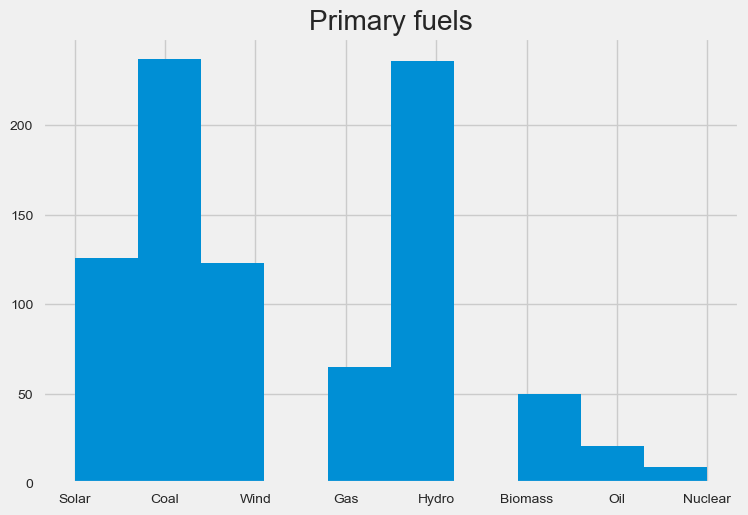

In [148]:
data["primary_fuel"].hist(grid=True)
plt.title("Primary fuels")
plt.show()

There is class imbalance

In [149]:
#label
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the income column
data["primary_fuel"]=lab_enc.fit_transform(data['primary_fuel'])

y=data['primary_fuel']

In [150]:
x=data.drop(columns=["primary_fuel"])


#one hot encoding on data
data_encoded=pd.get_dummies(data)

In [151]:
#standardising the data for PCA
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaledX=scaler.fit_transform(data_encoded)

scaledX

array([[-1.63678909,  1.15214913, -0.91522265, ..., -0.39691736,
        14.68843082, -2.47114495],
       [ 0.21327991,  0.5967866 , -0.56924121, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [-0.28558363,  0.13162823, -1.92875856, ..., -0.39691736,
        -0.06808079,  0.40467072],
       ...,
       [-0.51624868, -0.94542669, -0.32722428, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [ 0.10220421,  0.52913754, -0.78628716, ..., -0.39691736,
        -0.06808079,  0.40467072],
       [-0.74592935, -1.81340815,  0.13602274, ..., -0.39691736,
        -0.06808079,  0.40467072]])

In [152]:
#PCA
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

var_cumu=np.cumsum(Y.explained_variance_ratio_)*100

var_cumu

array([  0.37918142,   0.6352948 ,   0.84929169,   1.0583923 ,
         1.255099  ,   1.44494579,   1.63064101,   1.81281607,
         1.99385999,   2.17479624,   2.35569221,   2.53653383,
         2.71737517,   2.89821587,   3.07905053,   3.25987374,
         3.44069026,   3.62149294,   3.80228823,   3.98306947,
         4.16383696,   4.3445946 ,   4.52533146,   4.70606831,
         4.88680509,   5.06754184,   5.24827859,   5.42901534,
         5.60975209,   5.79048884,   5.97122559,   6.15196234,
         6.33269909,   6.51343584,   6.69417259,   6.87490414,
         7.05563183,   7.23634905,   7.41705645,   7.59775799,
         7.77845623,   7.95913609,   8.13981202,   8.32044436,
         8.5010767 ,   8.68170903,   8.86234137,   9.04297371,
         9.22360605,   9.40423839,   9.58487072,   9.76550306,
         9.9461354 ,  10.12676774,  10.30740008,  10.48803242,
        10.66866475,  10.84929709,  11.02992943,  11.21056177,
        11.39119411,  11.57182644,  11.75245878,  11.93

In [153]:
# PCs explaines 95% of the variance?
k=np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: ",k)

Number of components explaining 95% variance:  810


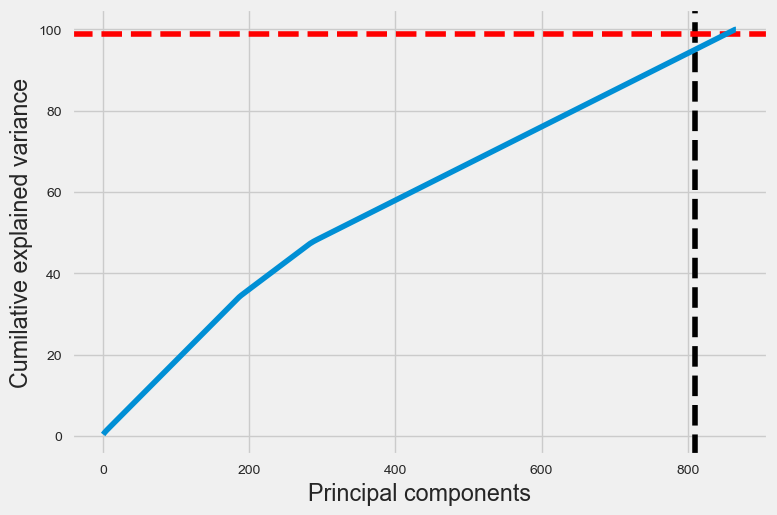

In [154]:
plt.ylabel('Cumilative explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k,color='k',linestyle='--')
plt.axhline(y=99,color='r',linestyle='--')

plt.plot(var_cumu)
plt.show()

In [155]:
# Creating final dataset with 810 columns

FinalPCA=PCA(n_components=810)
FinalData=FinalPCA.fit_transform(scaledX)

FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,800,801,802,803,804,805,806,807,808,809
0,-4.808510,1.343070,28.593822,-4.967215,3.046727,1.726825,-0.075896,-0.824220,-0.010507,0.008967,...,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00
1,-1.081557,-3.021209,-0.544220,-2.156710,1.722201,-1.482322,-1.269409,4.548270,0.370834,-1.162398,...,-3.813688e-01,6.869226e-02,1.818061e+00,1.273022e+00,3.279568e+00,-5.280559e-01,1.343861e+00,-1.285198e+00,-5.987163e-01,-1.049470e+00
2,-2.578436,-1.379580,0.831621,5.032673,-1.397905,-1.257118,-0.611995,0.395710,-0.008627,-0.017334,...,4.770834e-15,1.216336e-16,-1.396996e-15,6.047626e-16,-3.301066e-15,-1.043046e-14,7.968354e-15,7.526781e-15,4.942565e-15,-3.175992e-15
3,2.507173,-0.021361,-0.258416,-1.259566,-0.968884,1.060635,-0.361389,-0.295283,-0.001705,0.005883,...,1.803537e+00,-2.226082e-01,-1.222021e+00,-6.287700e-01,-3.951207e-01,-1.238120e+00,-1.405467e+00,-6.190101e-01,-2.313321e+00,-8.994521e-01
4,1.182742,-1.934986,-0.298674,-1.972924,-2.054980,0.443990,0.606418,-0.846823,-0.018463,0.013172,...,-4.863015e-01,-1.129537e+00,-2.453692e+00,1.107627e+00,1.073515e+00,-1.354821e+00,1.045081e+00,1.129493e+00,-1.503106e+00,-9.057214e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,2.910235,0.476217,-0.033167,-0.287681,0.132325,0.036322,0.497553,0.172006,0.010029,0.000235,...,3.265602e+00,-2.145234e+00,-1.248610e+00,4.169595e-01,-2.942665e-01,-1.180266e+00,-2.447276e+00,-7.345271e-03,-3.374761e+00,2.061668e+00
863,-5.025282,3.325937,-1.453829,0.843428,2.647726,8.546923,4.957787,-2.607554,0.451612,1.749044,...,-1.658789e-01,-3.192194e-01,2.525164e+00,3.335688e-01,4.068024e-01,1.903093e+00,-2.289877e+00,4.193140e-01,5.268354e+00,7.187638e-01
864,-1.114707,-1.085983,0.355721,3.009482,-1.439755,0.292576,-0.168028,-0.289481,-0.009749,-0.000177,...,-7.900845e-01,-4.406732e-02,2.294183e-01,-1.133191e+00,3.436358e-01,-1.820928e-01,6.249360e-02,1.705922e-01,-4.620427e-01,-5.483992e-02
865,-1.171381,-2.969454,-0.335995,-2.361464,1.037926,-5.546524,0.446103,6.511286,-0.538601,-3.224766,...,-3.962958e-01,1.022479e+00,-2.687607e+00,-1.539147e+00,-1.042122e+00,-5.464286e-01,-3.097796e-01,-1.246513e+00,-7.498919e-01,3.097660e+00


In [156]:
df=FinalData2

In [157]:
#splitting the data into train and test
x=df


x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [158]:
y_train.head()

797    3
525    1
79     3
133    6
88     3
Name: primary_fuel, dtype: int32

In [159]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.8018433179723502 on Random State 133


In [160]:
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=133)

In [161]:
#modelling

from sklearn.linear_model import LogisticRegression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8018433179723502
[[ 2  6  0  0  0  0  0  0]
 [ 0 55  2 10  0  0  0  0]
 [ 0  6  1  5  0  0  0  0]
 [ 0  8  0 49  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  1  2  0  1  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         8
           1       0.71      0.82      0.76        67
           2       0.25      0.08      0.12        12
           3       0.73      0.86      0.79        57
           4       0.00      0.00      0.00         1
           5       1.00      0.17      0.29         6
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        37

    accuracy                           0.80       217
   macro avg       0.71      0.52      0.55       217
weighted avg       0.80      0.80      0.78       217



In [162]:
#modelling
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.9262672811059908
[[ 8  0  0  0  0  0  0  0]
 [ 0 66  1  0  0  0  0  0]
 [ 0  1  8  2  0  1  0  0]
 [ 0  1  5 50  1  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  1  1  0  0  4  0  0]
 [ 0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.96      0.99      0.97        67
           2       0.53      0.67      0.59        12
           3       0.94      0.88      0.91        57
           4       0.00      0.00      0.00         1
           5       0.80      0.67      0.73         6
           6       0.97      1.00      0.98        29
           7       1.00      0.97      0.99        37

    accuracy                           0.93       217
   macro avg       0.77      0.77      0.77       217
weighted avg       0.93      0.93      0.93       217



In [163]:
#modelling
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9032258064516129
[[ 8  0  0  0  0  0  0  0]
 [ 0 64  2  1  0  0  0  0]
 [ 0  3  2  7  0  0  0  0]
 [ 0  0  1 55  0  1  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  1  1  0  2  0  0]
 [ 0  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.93      0.96      0.94        67
           2       0.33      0.17      0.22        12
           3       0.85      0.96      0.90        57
           4       0.00      0.00      0.00         1
           5       0.67      0.33      0.44         6
           6       1.00      0.97      0.98        29
           7       0.97      1.00      0.99        37

    accuracy                           0.90       217
   macro avg       0.72      0.67      0.68       217
weighted avg       0.88      0.90      0.89       217



In [164]:
#modelling
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

ad_pred=svc.predict(x_test)

print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.4423963133640553
[[ 0  2  0  0  0  0  6  0]
 [ 0 11  0 51  0  0  5  0]
 [ 0  0  0 12  0  0  0  0]
 [ 0  0  0 57  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  2  0  2  0  0  2  0]
 [ 0  1  0  0  0  0 28  0]
 [ 0 22  0 15  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.29      0.16      0.21        67
           2       0.00      0.00      0.00        12
           3       0.41      1.00      0.58        57
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         6
           6       0.68      0.97      0.80        29
           7       0.00      0.00      0.00        37

    accuracy                           0.44       217
   macro avg       0.17      0.27      0.20       217
weighted avg       0.29      0.44      0.33       217



In [165]:
#Finding overfitting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

scr=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree model :", scr.mean())

scr=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest model :", scr.mean())

scr=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7404823599760813
Cross validation score of Decision Tree model : 0.922769251212544
Cross validation score of Random Forest model : 0.9112152016477311
Cross validation score of SVC model : 0.45327885190352796


Decision tree model is best model

#### Hyperparameter tuning

In [166]:
#Decision Tree CLassifier
paramters={'criterion':['gini', 'entropy'],
           'splitter':['best', 'random'],
           'min_samples_split':[2,3,4,5],
           'min_samples_leaf':[2,3,4,5,6],
           'max_leaf_nodes':[2,3,4,5,10],
}

In [167]:
GCV=GridSearchCV(DecisionTreeClassifier(),paramters,cv=5)

In [168]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_leaf_nodes': [2, 3, 4, 5, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [169]:
GCV.best_params_

{'criterion': 'entropy',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [170]:
mod=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,min_samples_leaf=2,min_samples_split=2,splitter='best')

In [171]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

90.32258064516128


In [172]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

#### Saving of model

In [173]:
import joblib
joblib.dump(mod,'GlobalPowerPlant.pk1')

['GlobalPowerPlant.pk1']